In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.colors import Normalize

In [2]:
def gerar_rede2(n, dtheta = 0):
    x0 = [0, 0.5, 1.0]
    y0 = [0, np.sin(np.deg2rad(60)), 0]
    
    mx0 = [-np.cos(np.deg2rad(30 + dtheta)), np.cos(np.deg2rad(90+ dtheta)), -np.cos(np.deg2rad(150+ dtheta))]
    my0 = [-np.sin(np.deg2rad(30+ dtheta)), np.sin(np.deg2rad(90+ dtheta)), -np.sin(np.deg2rad(150+ dtheta))]
    
    x = []
    y = []
    mx = []
    my = []

    for j in range(n):
        for i in range(n):
            for k in range(3):
                x.append(x0[k] + 2*i + (j)%2)
                y.append(y0[k] + 2*np.sin(np.deg2rad(60))*(j))
                mx.append(mx0[k])
                my.append(my0[k])
                
    return np.array(x), np.array(y), np.array(mx), np.array(my)

In [3]:
def Dipolar(x, y, mx, my, S, i, j):
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dij = np.sqrt(dx**2 + dy**2)
    dx /= dij
    dy /= dij
    A1 = mx[i]*mx[j] + my[i]*my[j]
    A2 = 3*(mx[i]*dx + my[i]*dy)*(mx[j]*dx + my[j]*dy)
    return 0.5*S[i]*S[j]*(A1 - A2)/dij**3

In [38]:
def plot_quiver(x, y, mx, my, S, title=None):
    normalize_rad = Normalize(vmin=0, vmax=2*np.pi)
    C = np.arctan2(S*my, S*mx)
    C[C<0] = 2*np.pi + C[C<0] 
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    #plt.figure(figsize=(10, 7))
    ax.set_facecolor('aliceblue')
    kwargs = {
        'norm': normalize_rad,
        'angles': 'xy',
        'scale_units': 'xy',
        'units': 'xy',
    }
    quiv = ax.quiver(x, y, S*mx, S*my, C, cmap='hsv', pivot='middle', alpha=1, **kwargs)
    ax.axis('equal')
    if title != None:
        ax.set_title(title)
        
    return plt

In [12]:
Nx = 100
Ny = 100

xx = np.linspace(-1, 5, Nx)
yy = np.linspace(-0.5, 4, Ny)
XX, YY = np.meshgrid(xx, yy)


def Campo(x, y, mx, my, S):
    Bx = np.zeros((Nx, Ny))
    By = np.zeros((Nx, Ny))
    Pot = np.zeros((Nx, Ny))
    for iB in range(Nx):
        for jB in range(Ny):
            for i in range(len(x)):
                dx = XX[iB, jB] - x[i]
                dy = YY[iB, jB] - y[i]
                dist = np.sqrt(dx**2 + dy**2)
                if dist > 0.1:
                    dx /= dist
                    dy /= dist
                    Bx[iB, jB] += S[i]*(3*(mx[i]*dx + my[i]*dy)*dx - mx[i])/dist**3
                    By[iB, jB] += S[i]*(3*(mx[i]*dx + my[i]*dy)*dy - my[i])/dist**3
                    Pot[iB, jB] += -S[i]*(mx[i]*dx + my[i]*dy)/dist**2
    return Bx, By, Pot

In [5]:
def all_configs(n):
    elements = [1, -1]
    return list(itertools.product(elements, repeat=n))

In [6]:
x, y, mx, my = gerar_rede2(2, 0)
n = len(x)
S = all_configs(n)

In [7]:
ener = []
for k in range(len(S)):
    dip = 0
    for i in range(n):
        for j in range(n):
            if j != i:
                dip += Dipolar(x, y, mx, my, S[k], i, j)
    ener.appendnd(dip)

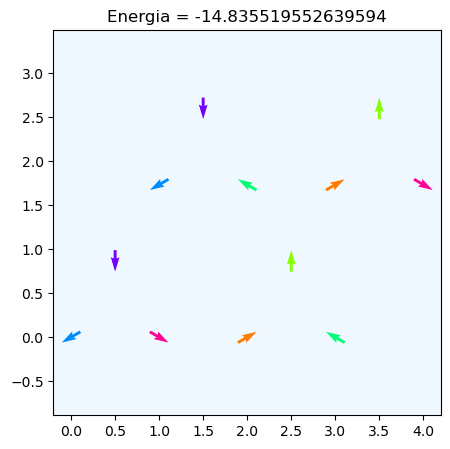

In [9]:
k = ener.index(min(ener))
plot_quiver(x, y, mx, my, S[k], title=f'Energia = {ener[k]}')

In [20]:
Bx0, By0, Pot0 = Campo(x, y, mx, my, S[k])

In [21]:
Bx1, By1, Pot1 = Campo(x, y, mx, my, S[0])

In [56]:
def plot_pot(x, y, mx, my, S, k, Pot0, Pot1=None):
    plt.figure(figsize=(15.8, 10), facecolor='lavender')
    plt.axis('equal')

    kwargs = {
        'norm': normalize_rad,
        'angles': 'xy',
        'scale_units': 'xy',
        'units': 'xy',
        'scale': 2.5
    }
    
    if Pot1 != None:
        plt.imshow(Pot1-Pot0, interpolation='spline36', extent=(-0.5, 1.5, -0.5, 1.5), alpha=0.7, origin='lower', vmin=-10, vmax=10, cmap='gray')
        plt.colorbar()
        plt.streamplot(XX, YY, Bx1-Bx0, By1-By0, linewidth=1, density=2)
        plt.quiver(x, y, S[k]*mx, S[k]*my, pivot='middle', alpha=0.8, **kwargs)
    else:
        plt.imshow(Pot0, interpolation='spline36', extent=(-0.5, 4.5, -0.5, 3), alpha=0.7, origin='lower', vmin=-10, vmax=10, cmap='gray')
        plt.colorbar()
        plt.streamplot(XX, YY, Bx0, By0, linewidth=1, density=2)
        plt.quiver(x, y, S[k]*mx, S[k]*my, pivot='middle', alpha=0.8, **kwargs)
    
    return plt

<module 'matplotlib.pyplot' from '/home/davib/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

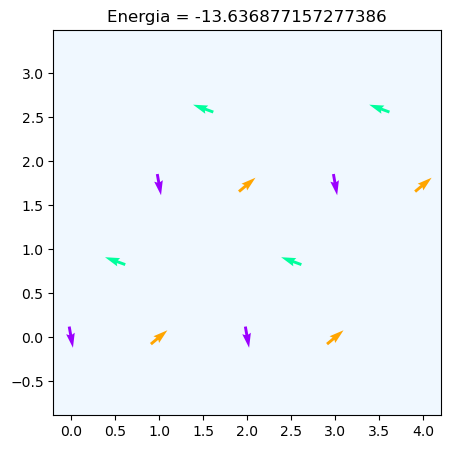

In [74]:
Nx = 100
Ny = 100

x, y, mx, my = gerar_rede2(2, 70)
n = len(x)
S = all_configs(n)

ener = []
for k in range(len(S)):
    dip = 0
    for i in range(n):
        for j in range(n):
            if j != i:
                dip += Dipolar(x, y, mx, my, S[k], i, j)
    ener.append(dip)
    
k = ener.index(min(ener))
plot_quiver(x, y, mx, my, S[k], title=f'Energia = {ener[k]}')

/tmp/ipykernel_5026/2403941802.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15.8, 10), facecolor='lavender')
/tmp/ipykernel_5026/2741564435.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

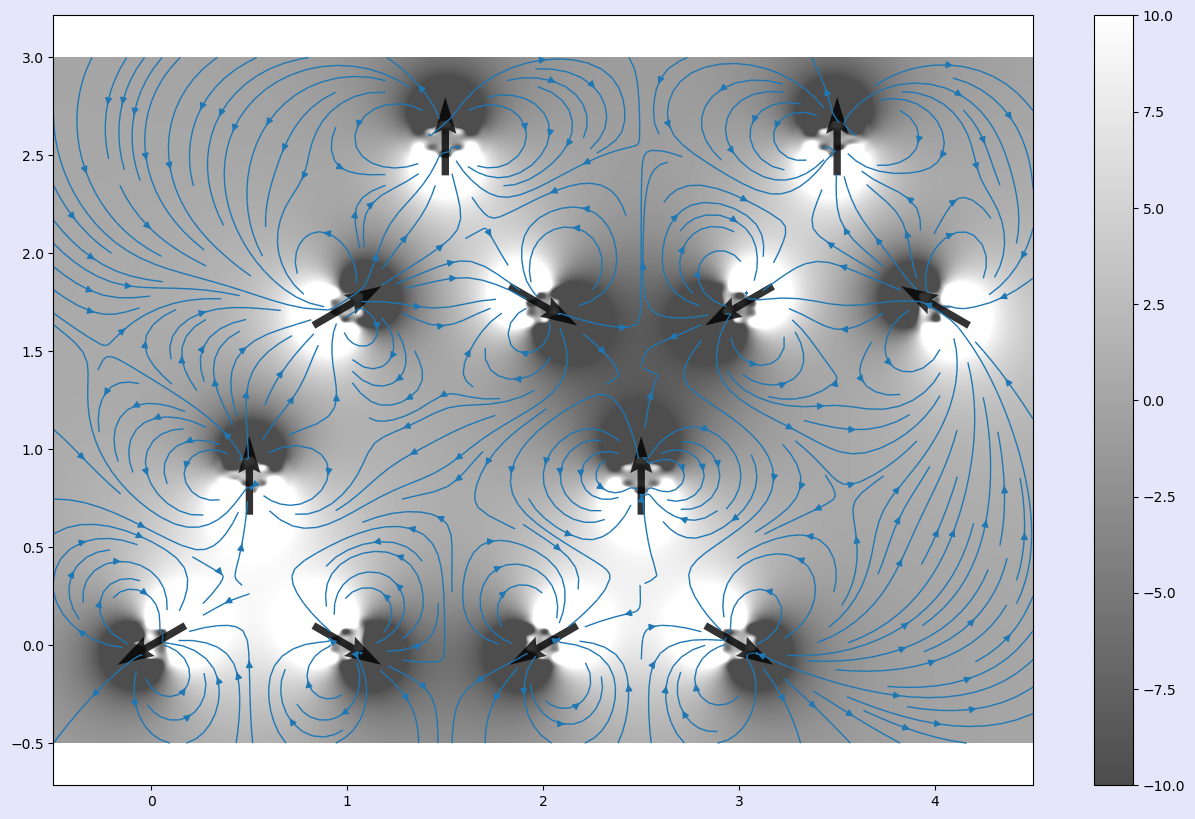

In [60]:
import matplotlib.pyplot as plt

xx = np.linspace(-0.5, 4.5, Nx)
yy = np.linspace(-0.5, 3, Ny)
XX, YY = np.meshgrid(xx, yy)

def salvar_grafico(figura, nome_arquivo):
    # Salve a figura em um arquivo png
    figura.savefig(nome_arquivo)

# Exemplo de uso:
num_graficos = 5
nome_base_conf = "imgs/config"
nome_base_pot = "imgs/Pot"

for i in range(len(S)):
    # Gere o gráfico
    Bx0, By0, Pot0 = Campo(x, y, mx, my, S[i])
    fig1 = plot_quiver(x, y, mx, my, S[i], title=f'Energia = {np.around(ener[i], 4)}')

    # Salve o gráfico em um arquivo png com um nome diferente para cada gráfico
    nome_arquivo = f"{nome_base_conf}_{i+1}.png"
    salvar_grafico(fig1, nome_arquivo)
    
    plt.clf()

    fig2 = plot_pot(x, y, mx, my, S, i, Pot0, Pot1=None)
    nome_arquivo = f"{nome_base_pot}_{i+1}.png"
    salvar_grafico(fig2, nome_arquivo)
    
    plt.clf()
    plt.close()

In [36]:
nome_base = 'imgs/graph'

Text(0.5, 1.0, 'Energia = -3.63534')

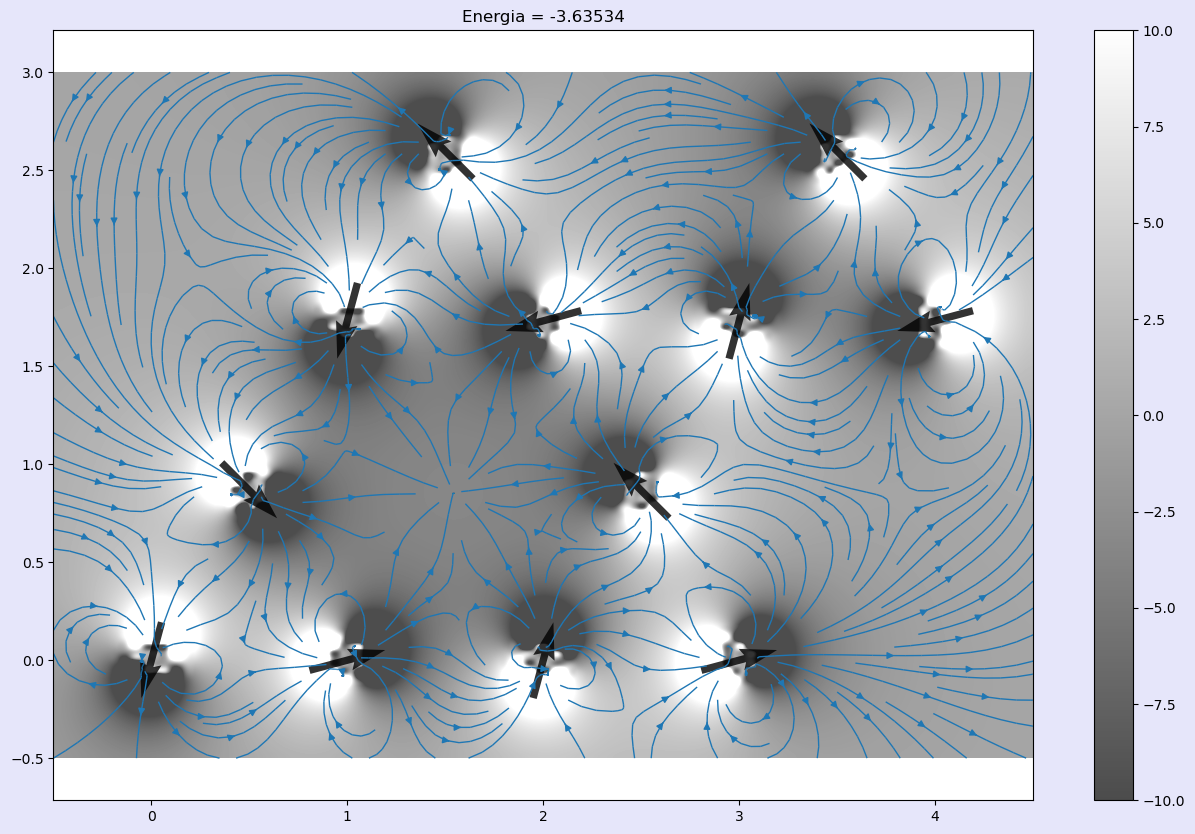

In [70]:
k = ener.index(min(ener))
Bx0, By0, Pot0 = Campo(x, y, mx, my, S[k])
plot_pot(x, y, mx, my, S, k, Pot0, Pot1=None)
plt.title(f'Energia = {np.around(ener[k], 5)}')

Text(0.5, 1.0, 'Energia = 3.98253')

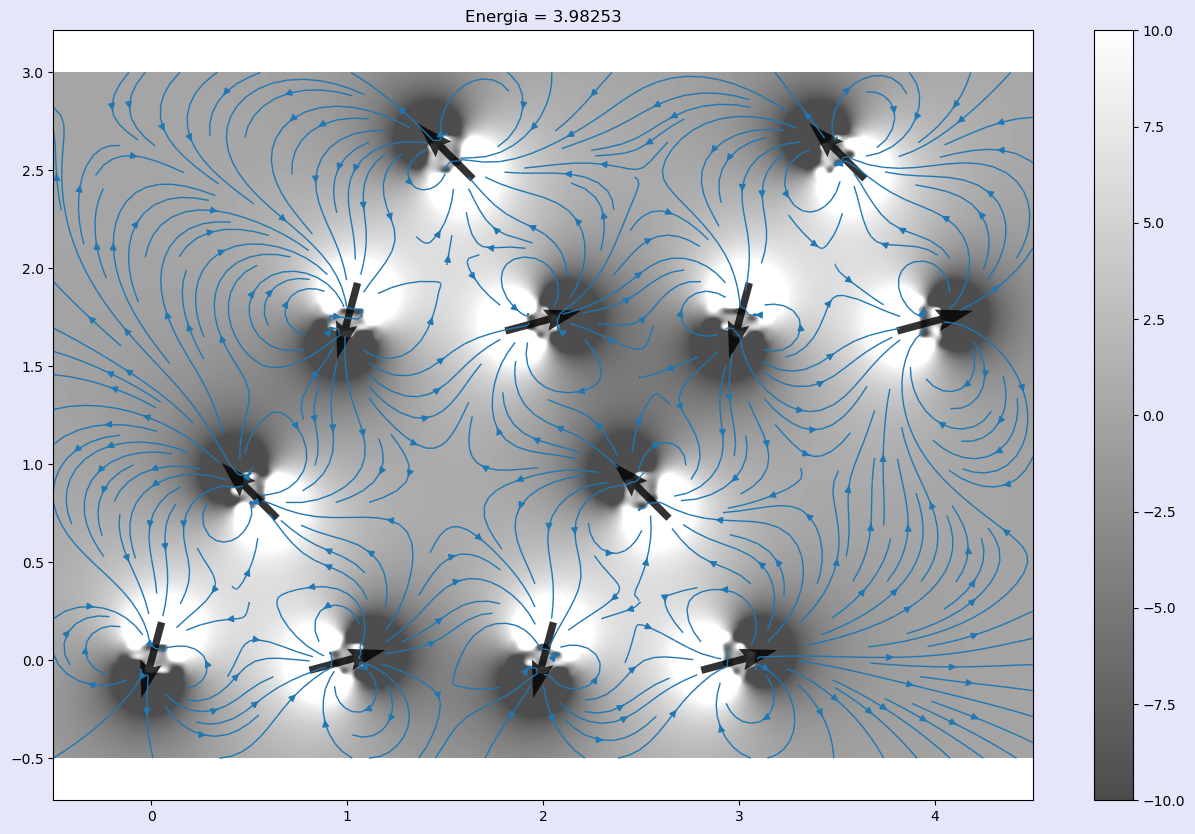

In [71]:
k1 = ener.index(max(ener))
Bx0, By0, Pot0 = Campo(x, y, mx, my, S[k1])
plot_pot(x, y, mx, my, S, k1, Pot0, Pot1=None)
plt.title(f'Energia = {np.around(ener[k1], 5)}')

In [72]:
S[k]

(1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1)

In [73]:
S[k1]

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

# Determinar a configuração de menor energia das redes

In [83]:
def calc_ener(x, y, mx, my, S):
    ener = []
    n = len(x)
    for k in range(len(S)):
        dip = 0
        for i in range(n):
            for j in range(n):
                if j != i:
                    dip += Dipolar(x, y, mx, my, S[k], i, j)
        ener.append(dip)
    k = ener.index(min(ener))
    return k, ener[k]

In [178]:
def Dipolar(x, y, mx, my, S, i, j):
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dij = np.sqrt(dx**2 + dy**2)
    dx /= dij
    dy /= dij
    A1 = mx[i]*mx[j] + my[i]*my[j]
    A2 = 3*(mx[i]*dx + my[i]*dy)*(mx[j]*dx + my[j]*dy)
    return 0.5*S[i]*S[j]*(A1 - A2)/dij**3

In [180]:

def calc_ener1(x, y, mx, my, S):
    ener = []
    n = len(x)
    for k in range(len(S)):
        dip = 0
        for i in range(n):
            for j in range(n):
                if j != i:
                    dip += Dipolar(x, y, mx, my, S[k], i, j)
        ener.append(dip/(3*n*n))
    k = np.argmin(ener)
    return k, ener[k]

In [170]:
n = 2
S = all_configs(3*n*n)

In [171]:
theta = np.linspace(0, 90, 40)

In [172]:
config = []
index = []
ener_min = []
for i in theta:
    x, y, mx, my = gerar_rede2(2, i)
    k, ener = calc_ener1(x, y, mx, my, S)
    index.append(k)
    config.append(S[k])
    ener_min.append(ener)

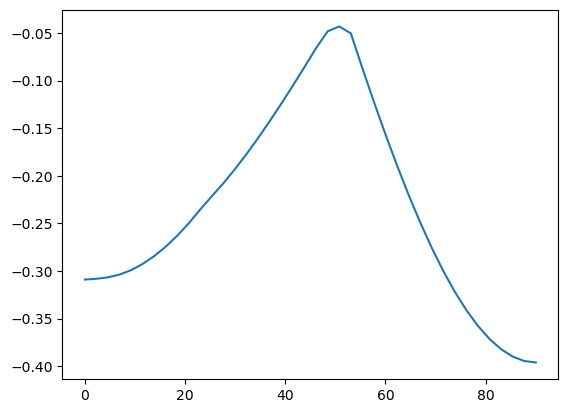

In [173]:
plt.plot(theta, ener_min)

In [141]:
theta2 = np.linspace(40, 60, 40)

config2 = []
index2 = []
ener_min2 = []
for i in theta2:
    x, y, mx, my = gerar_rede2(2, i)
    k, ener = calc_ener1(x, y, mx, my, S)
    index2.append(k)
    config2.append(S[k])
    ener_min2.append(ener)

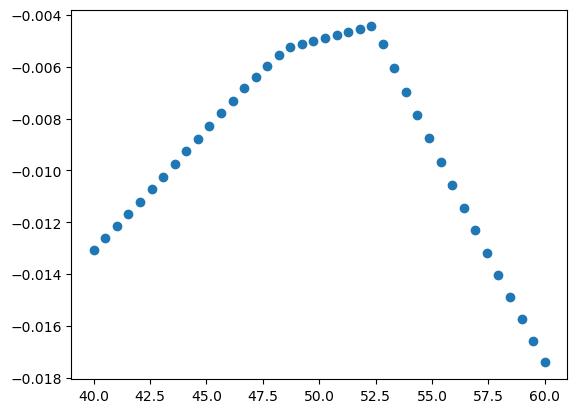

In [182]:
plt.scatter(theta2, ener_min2)

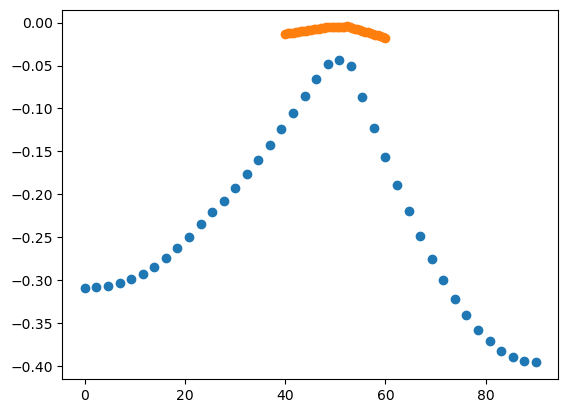

In [183]:
plt.scatter(theta, ener_min)
plt.scatter(theta2, ener_min2)

In [174]:
np.savetxt('S.txt', config, delimiter=',', fmt='%d')

In [175]:
np.savetxt('theta.txt', theta, delimiter=',', fmt='%d')

In [176]:
np.savetxt('Energia.txt', ener_min, delimiter=',', fmt='%f')

Text(0.5, 1.0, 'Energia = -0.034341\n $\\theta = 0.0$')

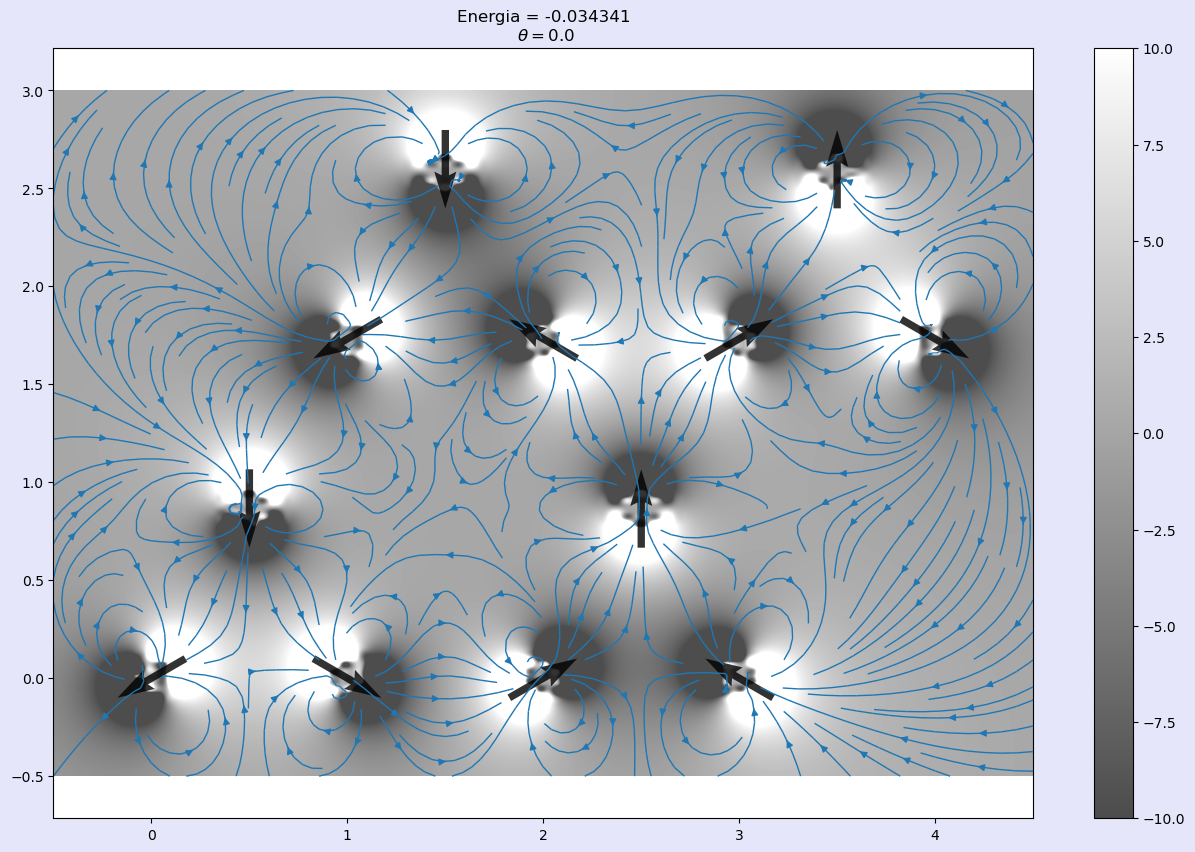

In [163]:
i = 0
k = index[i]
x, y, mx, my = gerar_rede2(2, theta[i])
Bx0, By0, Pot0 = Campo(x, y, mx, my, S[k])
plot_pot(x, y, mx, my, S, k, Pot0, Pot1=None)
plt.title(f'Energia = {np.around(ener_min[i], 6)}\n $\\theta = {theta[i]}$')

In [177]:
num_graficos = 5
nome_base_conf = "imgs/config"
nome_base_pot = "imgs/Pot"

for i in range(len(theta)):
    # Gere o gráfico
    x, y, mx, my = gerar_rede2(2, theta[i])
    k = index[i]
    Bx0, By0, Pot0 = Campo(x, y, mx, my, S[k])
    fig1 = plot_quiver(x, y, mx, my, S[k], title=f'Energia = {np.around(ener_min[i], 4)}')

    # Salve o gráfico em um arquivo png com um nome diferente para cada gráfico
    nome_arquivo = f"{nome_base_conf}_{i+1}.png"
    salvar_grafico(fig1, nome_arquivo)
    
    plt.clf()

    fig2 = plot_pot(x, y, mx, my, S, k, Pot0, Pot1=None)
    nome_arquivo = f"{nome_base_pot}_{i+1}.png"
    salvar_grafico(fig2, nome_arquivo)
    
    plt.clf()
    plt.close()

/tmp/ipykernel_5026/2403941802.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15.8, 10), facecolor='lavender')
/tmp/ipykernel_5026/2741564435.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [166]:
for i in range(-1,2):
    print(i)

-1
0
1


In [167]:
x.max()

4.0